In [27]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer

from LoopStructural.modelling.fault.fault_function import CubicFunction, FaultDisplacement, Ones, Composite
from LoopStructural.modelling.fault.fault_function_feature import FaultDisplacementFeature

from LoopStructural.datasets import value_headers, strike_dip_headers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [28]:
output='graben'
if not os.path.exists(output):
    os.mkdir(output)

In [18]:
bb = np.array([[0,0,0],
               [20,10,10]])
fault_value_data1 = pd.DataFrame([[2,5,9,0,0],
                                 [5,5,5,0,1],
#                                  [7,7,7,1,1],
                                 [5,0,5,0,2],
                                 [5,10,5,1,2],
                                ],
                                columns=value_headers()+['coord'])
fault_value_data1['type'] = 'fault1'
fault_strike_data1 = pd.DataFrame([[5,5,5,0,60,0],
                                  [5,5,5,180,60,1],
                                 [5,5,5,90,90,2]],
                                columns=strike_dip_headers()+['coord'])
fault_strike_data1['type'] = 'fault1'

fault_value_data2 = pd.DataFrame([[18,5,9,0,0],
                                 [5,5,5,0,1],
#                                  [7,7,7,1,1],
                                 [5,0,5,0,2],
                                 [5,10,5,1,2],
                                ],
                                columns=value_headers()+['coord'])
fault_value_data2['type'] = 'fault2'
fault_strike_data2 = pd.DataFrame([[5,5,5,180,60,0],
                                  [5,5,5,0,60,1],
                                 [5,5,5,90,90,2]],
                                columns=strike_dip_headers()+['coord'])
fault_strike_data2['type'] = 'fault2'


strati_data = pd.DataFrame([[5,5,5,0]],columns=value_headers())
strati_data['type'] = 'strati'
strati_strike = pd.DataFrame([[5,5,5,0,0]],columns=strike_dip_headers())
strati_strike['type'] = 'strati'

In [19]:
data = pd.concat([fault_strike_data1,fault_value_data1,fault_strike_data2,fault_value_data2,strati_strike,strati_data],sort=False)

In [20]:
rotation = [76.60582733154297, -13.266486167907715, -176.5645294189453]

### Set up the model

In [21]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(data)


fault = model.create_and_add_fault('fault1',
                                   1,
                                   nelements=5000,
                                   interpolatortype='FDI',
                                   solver='lu',
                                   damp=True,
                                   buffer=0.2)
abutregion = lambda pos : fault['feature'].evaluate(pos)
fault2 = model.create_and_add_fault('fault2',
                                   1,
                                   nelements=5000,
                                   interpolatortype='FDI',
                                   solver='lu',
                                   damp=True,
                                   buffer=0.2,
                                    abut=fault['feature']
                                   )
strati = model.create_and_add_foliation('strati',
                                        nelements=5000,
                                        interpolatortype='FDI',
                                        solver='lu',
                                        damp=True,buffer=0.5)
# f1_displacement_feature = FaultDisplacementFeature(fault['feature'].faultframe,fault_displacement)


### Fault displacement figure


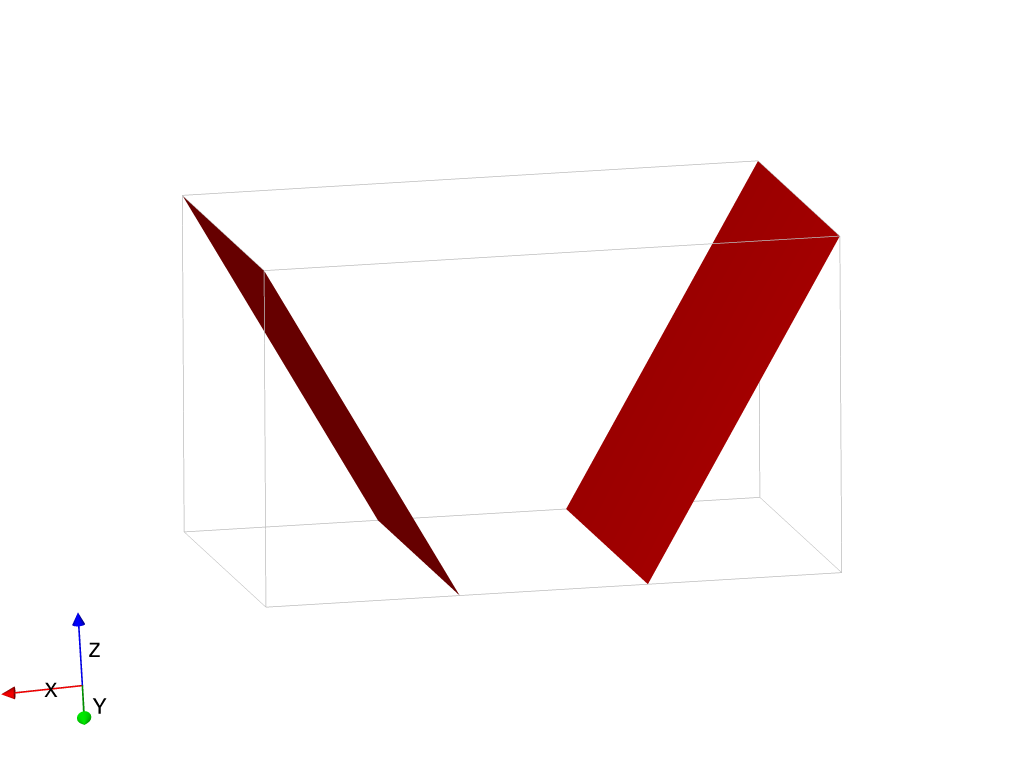

'graben/faults.png'

In [35]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault['feature'],isovalue=0)
viewer.add_isosurface(fault2['feature'],isovalue=0)

# for i in range(3):
#     viewer.add_data(fault['feature'][i])
# # viewer.add_isosurface(fault['feature'][1],nslices=5)
# # # viewer.add_isosurface(fault['feature'][2],nslices=5)
# viewer.add_isosurface(strati['feature'],
#                      nslices=5)
# viewer.add_scalar_field(strati['feature'],cmap='tab20')
# # viewer.add_scalar_field(f1_displacement_feature,cmap='rainbow')
viewer.lv.rotate(rotation)
viewer.lv.display()
viewer.lv.image(output+'/faults.png')
# viewer.interactive()


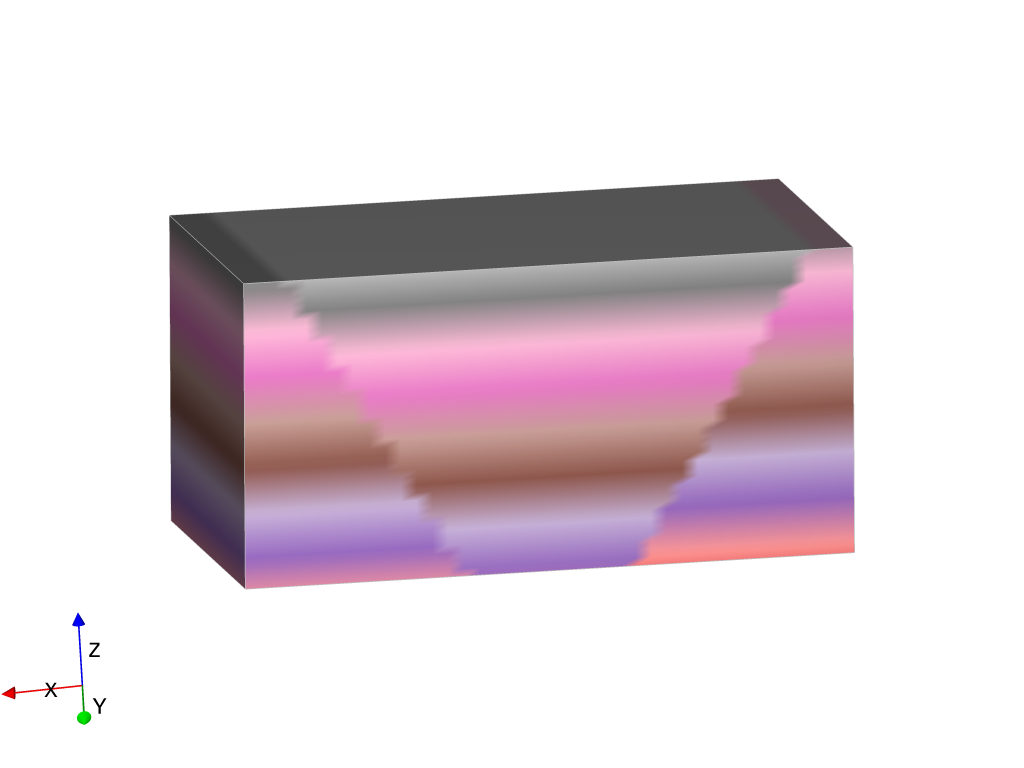

'graben/scalar_field.png'

In [34]:
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(strati['feature'],cmap='tab20')

# f1_displacement_feature = FaultDisplacementFeature(fault['feature'].faultframe,fault_displacement)
# viewer.add_scalar_field(f1_displacement_feature,cmap='viridis',vmin=-1,xmax=1)
# viewer.lv.rotatey(90)
viewer.lv.rotate(rotation)
viewer.lv.display()
viewer.lv.image(output+'/scalar_field.png')

### Faulted stratigraphy figure

### Surfaces

2019-11-27 15:41:47,086 LoopStructural.visualisation.model_visualisation WARNING  Isovalue doesn't exist inside bounding box
2019-11-27 15:41:47,087 LoopStructural.visualisation.model_visualisation WARNING  Isovalue doesn't exist inside bounding box
2019-11-27 15:41:47,088 LoopStructural.visualisation.model_visualisation WARNING  Isovalue doesn't exist inside bounding box
2019-11-27 15:41:47,088 LoopStructural.visualisation.model_visualisation WARNING  Isovalue doesn't exist inside bounding box
2019-11-27 15:42:02,496 LoopStructural.visualisation.model_visualisation WARNING  Isovalue doesn't exist inside bounding box
2019-11-27 15:42:02,497 LoopStructural.visualisation.model_visualisation WARNING  Isovalue doesn't exist inside bounding box



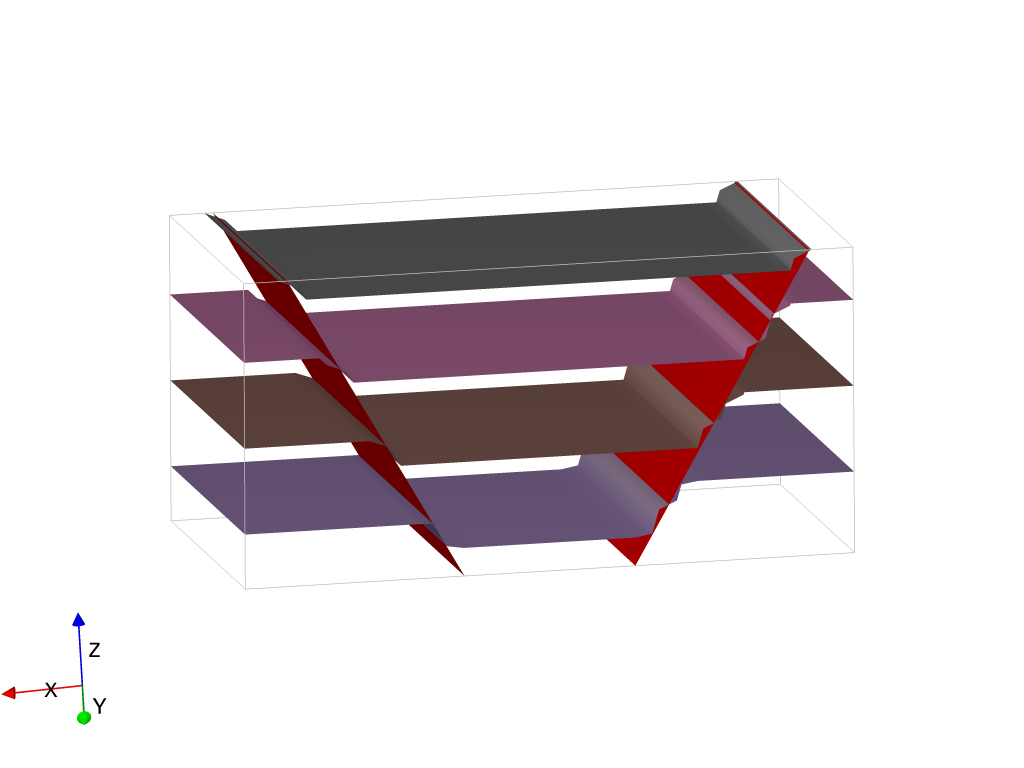

'graben/surfaces.png'

In [33]:
# fregion = lambda pos : f1_displacement_feature.evaluate_on_surface(pos) > 0.2
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault['feature'],
                      isovalue=0,
#                      region=fregion
                     )
viewer.add_isosurface(fault2['feature'],
                      isovalue=0,
#                      region=fregion
                     )
# for i in range(3):
#     viewer.add_data(fault['feature'][i])
# viewer.add_isosurface(fault['feature'][1],nslices=5)
# # viewer.add_isosurface(fault['feature'][2],nslices=5)
viewer.add_isosurface(strati['feature'],
#                       slices=[4,3,2,1],
                     nslices=10,
                     paint_with=strati['feature'],
                      cmap='tab20'
                     )
# viewer.add_scalar_field(strati['feature'],cmap='tab20')
# viewer.add_scalar_field(f1_displacement_feature,cmap='rainbow')
viewer.lv.rotate(rotation)
viewer.lv.display()
viewer.lv.image(output+'/surfaces.png')
# viewer.interactive()

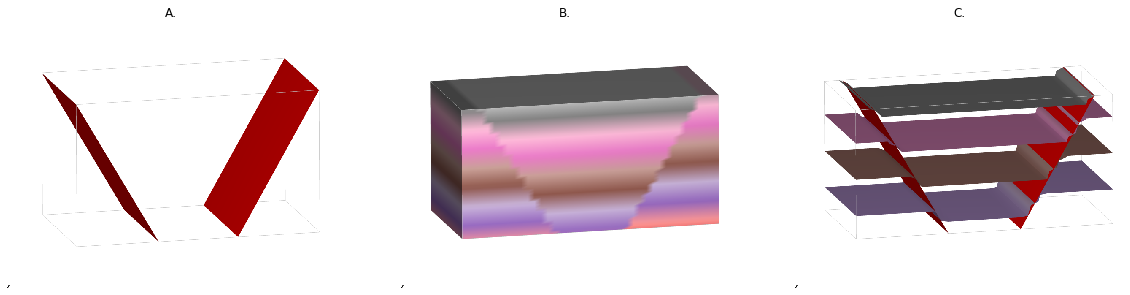

In [47]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].imshow(plt.imread(output+'/faults.png')[75:705, 100:880,:])
ax[0].set_title('A.')
ax[1].imshow(plt.imread(output+'/scalar_field.png')[75:705, 100:880,:])
ax[1].set_title('B.')
ax[2].imshow(plt.imread(output+'/surfaces.png')[75:705, 100:880,:])
ax[2].set_title('C.')
for i in range(1):
    for j in range(3):
        ax[j].axis('off')

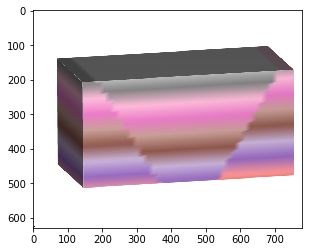

In [46]:
plt.imshow(plt.imread(output+'/scalar_field.png')[75:705, 100:880,:])